<a href="https://colab.research.google.com/github/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection/blob/master/AE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


add system path

In [12]:
%matplotlib inline
import os
import pdb
import sys
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

py_file_location = "/content/drive/MyDrive/Colab Notebooks/Adversarially-Learned-Anomaly-Detection/data"
sys.path.append(os.path.abspath(py_file_location))

class arythmia

In [7]:
import logging
import numpy as np
import pandas as pd 
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

class arrythmia :

  def __init__(self):
     return
  
  def get_train(self,label=0, scale=False, *args):
      """Get training dataset for Thyroid dataset"""
      return self._get_adapted_dataset("train", scale)

  def get_test(self,label=0, scale=False, *args):
      """Get testing dataset for Thyroid dataset"""
      return self._get_adapted_dataset("test", scale)

  def get_valid(self,label=0, scale=False, *args):
      """Get validation dataset for Thyroid dataset"""
      return None

  def get_shape_input(self):
      """Get shape of the dataset for Thyroid dataset"""
      return (None, 274)

  def get_shape_input_flatten(self):
      """Get shape of the dataset for Thyroid dataset"""
      return (None, 274) 

  def get_shape_label(self):
      """Get shape of the labels in Thyroid dataset"""
      return (None,)

  def get_anomalous_proportion(self):
      return 0.15

  def _get_dataset(self,scale):
      """ Gets the basic dataset
      Returns :
              dataset (dict): containing the data
                  dataset['x_train'] (np.array): training images shape
                  (?, 120)
                  dataset['y_train'] (np.array): training labels shape
                  (?,)
                  dataset['x_test'] (np.array): testing images shape
                  (?, 120)
                  dataset['y_test'] (np.array): testing labels shape
                  (?,)
      """
      data = scipy.io.loadmat("/content/drive/MyDrive/Colab Notebooks/Adversarially-Learned-Anomaly-Detection/data/arrhythmia.mat")
      full_x_data = data["X"]
      full_y_data = data['y']
      x_train, x_test, \
      y_train, y_test = train_test_split(full_x_data,
                                        full_y_data,
                                        test_size=0.2,
                                        random_state=42)

      y_train = y_train.flatten().astype(int)
      y_test = y_test.flatten().astype(int)

      if scale:
          print("Scaling dataset")
          scaler = MinMaxScaler()
          scaler.fit(x_train)
          x_train = scaler.transform(x_train)
          x_test = scaler.transform(x_test)

      
      dataset = {}
      dataset['x_train'] = x_train.astype(np.float32)
      dataset['y_train'] = y_train.astype(np.float32)
      dataset['x_test'] = x_test.astype(np.float32)
      dataset['y_test'] = y_test.astype(np.float32)
      return dataset

  def _get_adapted_dataset(self,split, scale):
      """ Gets the adapted dataset for the experiments

      Args :
              split (str): train or test
      Returns :
              (tuple): <training, testing> images and labels
      """
      # print("_get_adapted",scale)
      dataset = self._get_dataset(scale)
      key_img = 'x_' + split
      key_lbl = 'y_' + split
      
      print("Size of split", split, ":", dataset[key_lbl].shape[0])

      return (dataset[key_img], dataset[key_lbl])

  def _to_xy(self,df, target):
      """Converts a Pandas dataframe to the x,y inputs that TensorFlow needs"""
      result = []
      for x in df.columns:
          if x != target:
              result.append(x)
      dummies = df[target]
      return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)



AutoEncoder

In [73]:
data = scipy.io.loadmat("/content/drive/MyDrive/Colab Notebooks/Adversarially-Learned-Anomaly-Detection/data/arrhythmia.mat")
full_x_data = data["X"]
full_y_data = data['y']
x_train, x_test, y_train, y_test = train_test_split(full_x_data,
                                  full_y_data,
                                  test_size=0.2,
                                  random_state=42)

y_train = y_train.flatten().astype(int)
y_test = y_test.flatten().astype(int)
print("Scaling dataset")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
# print('Data loading...')
# data = arrythmia()
# label = 1
# x_train, y_train = data.get_train(label)
# x_train_copy = x_train.copy()
# x_test, y_testt = data.get_test(label)

Scaling dataset


274
Epoch 1/20
3/3 [==============================] - 1s 67ms/step - loss: 0.1580 - val_loss: 0.1644
Epoch 2/20
3/3 [==============================] - 0s 17ms/step - loss: 0.1562 - val_loss: 0.1613
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 0.1523 - val_loss: 0.1558
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 0.1460 - val_loss: 0.1478
Epoch 5/20
3/3 [==============================] - 0s 14ms/step - loss: 0.1372 - val_loss: 0.1370
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 0.1254 - val_loss: 0.1230
Epoch 7/20
3/3 [==============================] - 0s 14ms/step - loss: 0.1104 - val_loss: 0.1063
Epoch 8/20
3/3 [==============================] - 0s 14ms/step - loss: 0.0931 - val_loss: 0.0882
Epoch 9/20
3/3 [==============================] - 0s 17ms/step - loss: 0.0749 - val_loss: 0.0706
Epoch 10/20
3/3 [==============================] - 0s 15ms/step - loss: 0.0578 - val_loss: 0.0555
Epoch 11/20
3/3 [========

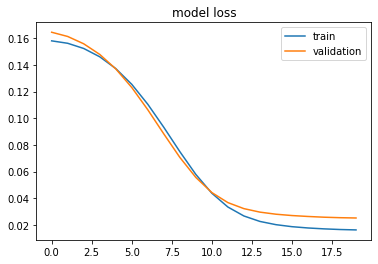

In [80]:
print(x_train.shape[1])
input_size = x_train.shape[1]
input_size = 274
hidden_size = 64
code_size = 8
epochs = 20
batch_size = 128

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size,name = "code_layer",activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)
# initialize
autoencoder = Model(inputs=x, outputs=r)
intermediate_layer_model = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('code_layer').output)
autoencoder.compile(optimizer='adam', loss='mse')
# plot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))
# train
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, x_test))
# test
decoded_imgs = autoencoder.predict(x_test)
intermediate_output = intermediate_layer_model.predict(x_test)
print(intermediate_output.shape)
# loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plot histogram

(452, 274)


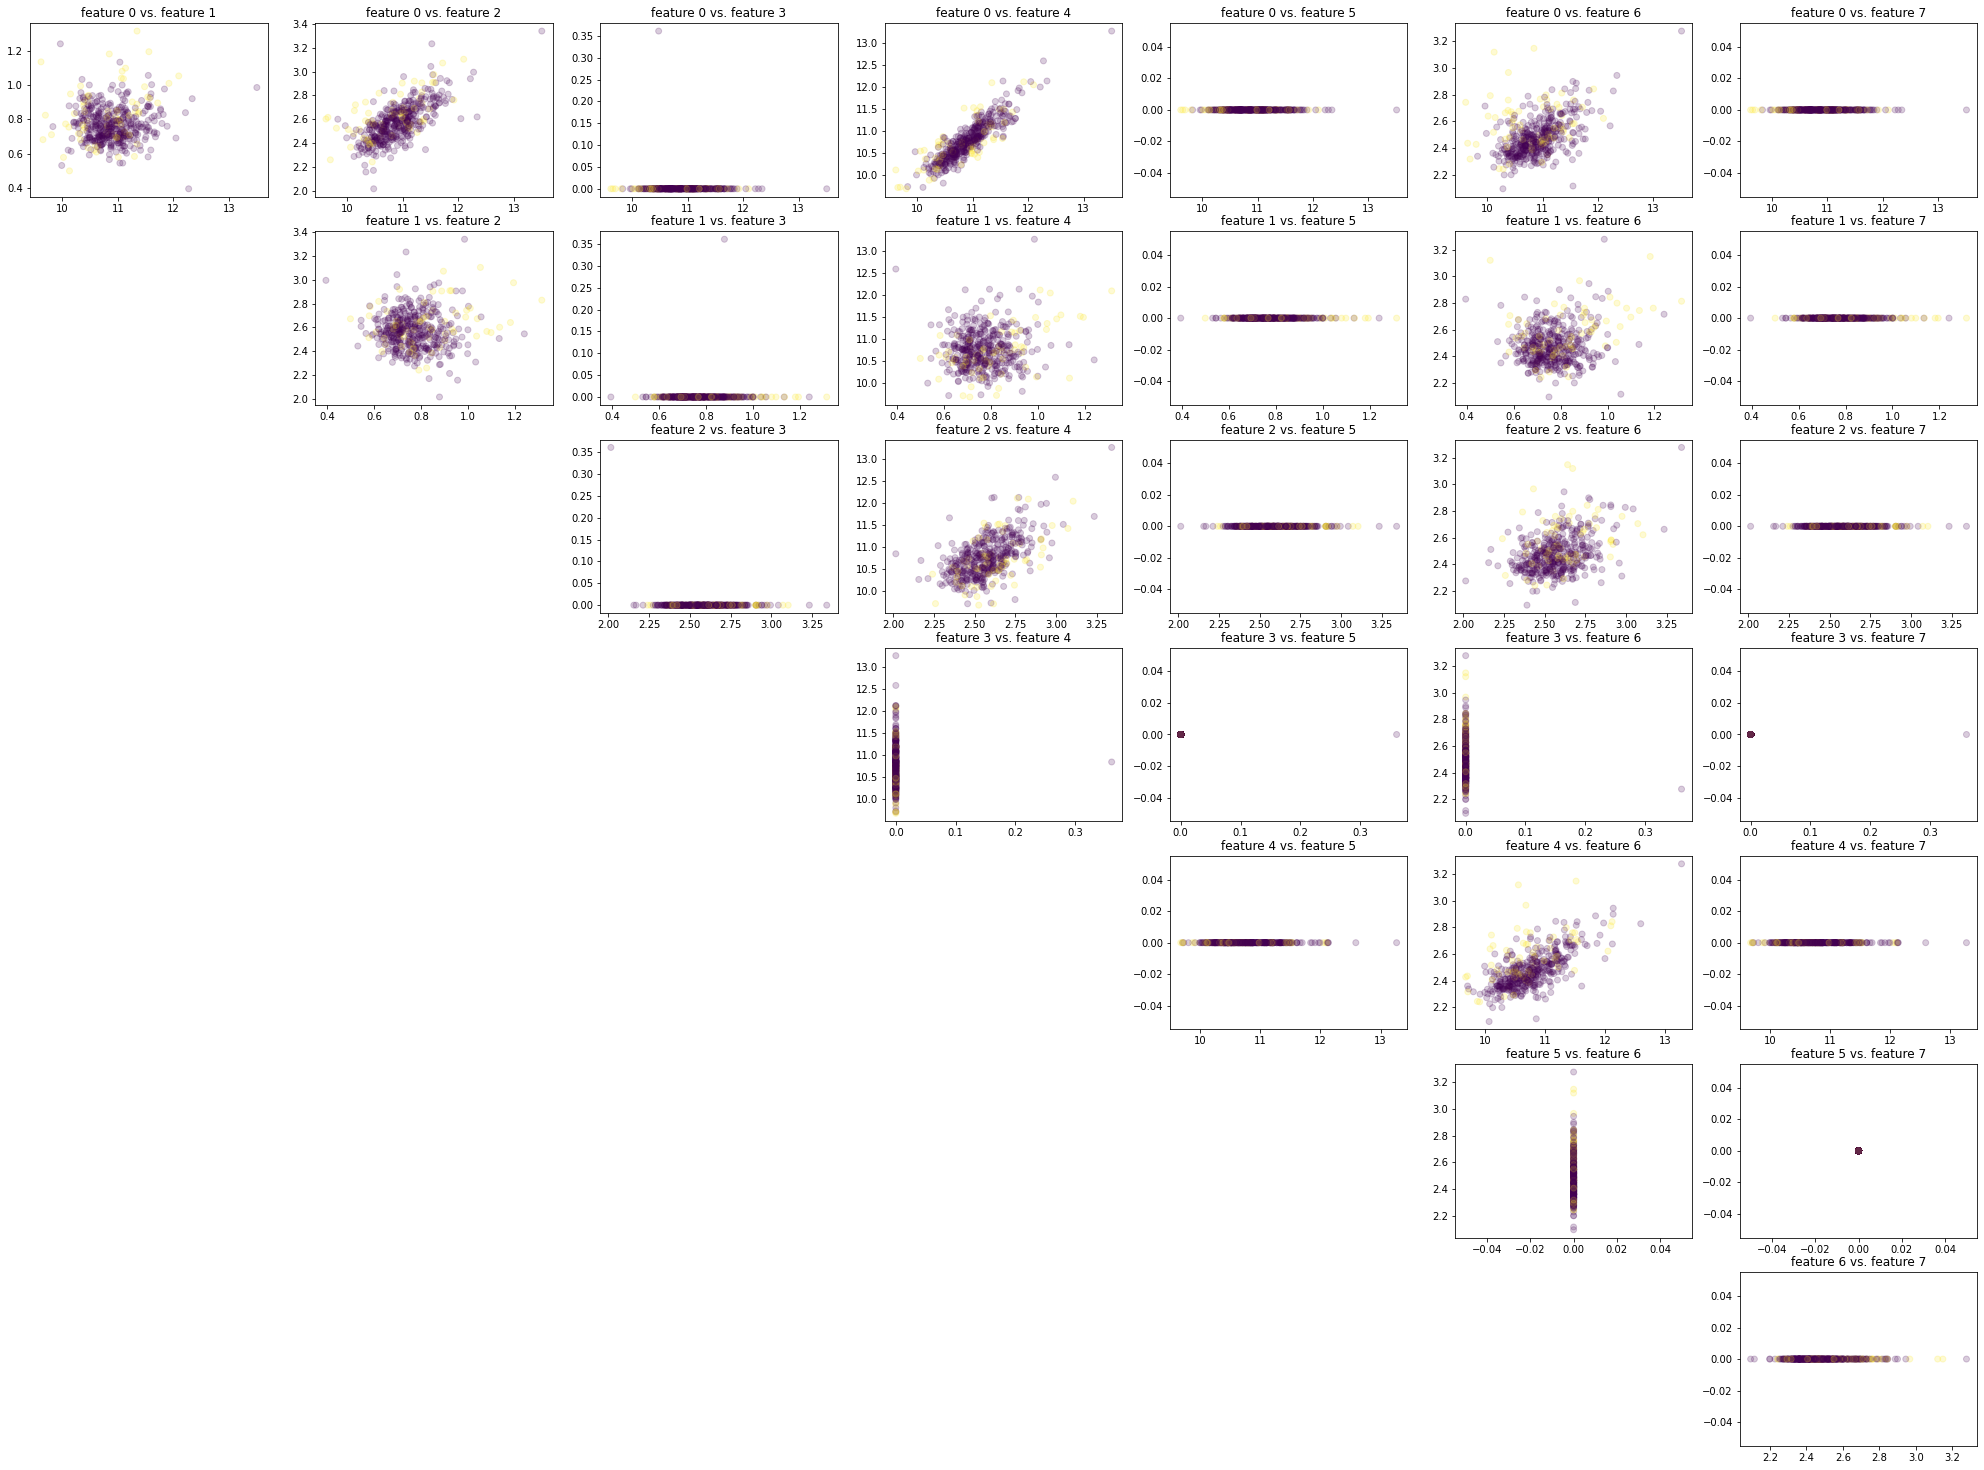

In [81]:
import matplotlib.gridspec as gridspec
alldata = np.concatenate((x_train,x_test), axis=0)
alllabel = np.concatenate((y_train,y_test))
print(alldata.shape)
code = intermediate_layer_model.predict(alldata)
fig = plt.figure(figsize=(40,30)) 
gs = gridspec.GridSpec(8, 8)
for i in range(code_size) :
  for j in range(i+1,code_size) :
    ax = plt.subplot(gs[i,j])
    ax.set_title("feature "+str(i)+" vs. feature "+str(j))
    ax.scatter(code[:, i], code[:, j], c=alllabel,alpha=0.2)
    fig.add_subplot(ax)
plt.show()

# for i in range(code_size) :
#   for j in range(i+1,code_size) :
 
#     plt.title("feature "+str(i)+" vs. feature "+str(j))
#     plt.scatter(code[:, i], code[:, j], c=alllabel,alpha=0.2)
#     plt.colorbar()
#     plt.show()